# Big Data in Finance - Data Exploration

## Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
import networkx as nx

## Datasets

In [3]:
claims = pd.read_csv('data/foreign_claims.csv', index_col=0)
scores = pd.read_csv('data/credit_score.csv', index_col=0)

## Data Cleaning

In [5]:
scores.rename({'South Korea': 'Korea'}, inplace=True)         # Aligning South Korea naming with other table
scores = scores[scores.index.isin(claims.index)].sort_index() # Aligning Scores-table with df
claims = claims[claims.index.isin(scores.index)].sort_index() # Aligning df-table with scores
assert list(claims.index) == list(scores.index), "Indices should match"

In [6]:
data = pd.merge(claims, scores, on='Country').drop('Rating', axis=1)
data

,Foreign Claims,Derivatives,Numeric Value
Country,,,
Australia,687.6,55.5,100.0
Austria,391.2,20.4,95.0
Belgium,233.5,32.7,90.0
Canada,1897.9,115.3,100.0
Chile,14.2,2.6,80.0
Finland,472.9,58.3,95.0
France,3098.6,146.5,90.0
Germany,1873.4,695.3,100.0
Greece,57.7,1.0,40.0


## Pre-Processing ##

In [7]:
# Calculate Betas:
betas = []
weighted_betas = [] # weighted by Derivatives
tot_claims = data['Foreign Claims'].sum()
tot_derivatives = data['Derivatives'].sum()

for i in range(len(data)):
      weight = data['Derivatives'][i]/tot_derivatives
      num = data['Foreign Claims'][i]
      betas.append(num/tot_claims)
      weighted_betas.append((num/tot_claims)*weight)
    
weighted_betas = [float(i)/sum(weighted_betas) for i in weighted_betas]

#Calculate Gammas:
gammas = []
for i in range(len(data)):
    gammas.append(1/(101-data['Numeric Value'][i]))
    

In [8]:
# Add Betas and Gammas to DataFrame:
data['betas'] = betas
data['gammas'] = gammas
data['weighted betas'] = weighted_betas

data

,Foreign Claims,Derivatives,Numeric Value,betas,gammas,weighted betas
Country,,,,,,
Australia,687.6,55.5,100.0,0.025719,1.000000,0.006623
Austria,391.2,20.4,95.0,0.014632,0.166667,0.001385
Belgium,233.5,32.7,90.0,0.008734,0.090909,0.001325
Canada,1897.9,115.3,100.0,0.070988,1.000000,0.037976
Chile,14.2,2.6,80.0,0.000531,0.047619,0.000006
Finland,472.9,58.3,95.0,0.017688,0.166667,0.004785
France,3098.6,146.5,90.0,0.115899,0.090909,0.078780
Germany,1873.4,695.3,100.0,0.070072,1.000000,0.226055
Greece,57.7,1.0,40.0,0.002158,0.016393,0.000010


## Exploratory Analysis ##

In [9]:
data=data.reset_index()
data

,Country,Foreign Claims,Derivatives,Numeric Value,betas,gammas,weighted betas
0,Australia,687.6,55.5,100.0,0.025719,1.000000,0.006623
1,Austria,391.2,20.4,95.0,0.014632,0.166667,0.001385
2,Belgium,233.5,32.7,90.0,0.008734,0.090909,0.001325
3,Canada,1897.9,115.3,100.0,0.070988,1.000000,0.037976
4,Chile,14.2,2.6,80.0,0.000531,0.047619,0.000006
5,Finland,472.9,58.3,95.0,0.017688,0.166667,0.004785
6,France,3098.6,146.5,90.0,0.115899,0.090909,0.078780
7,Germany,1873.4,695.3,100.0,0.070072,1.000000,0.226055
8,Greece,57.7,1.0,40.0,0.002158,0.016393,0.000010
9,India,85.6,58.9,55.0,0.003202,0.021739,0.000875


### Visualize Betas and Gammas by Country

(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
        11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
        22.2]), <a list of 23 Text xticklabel objects>)

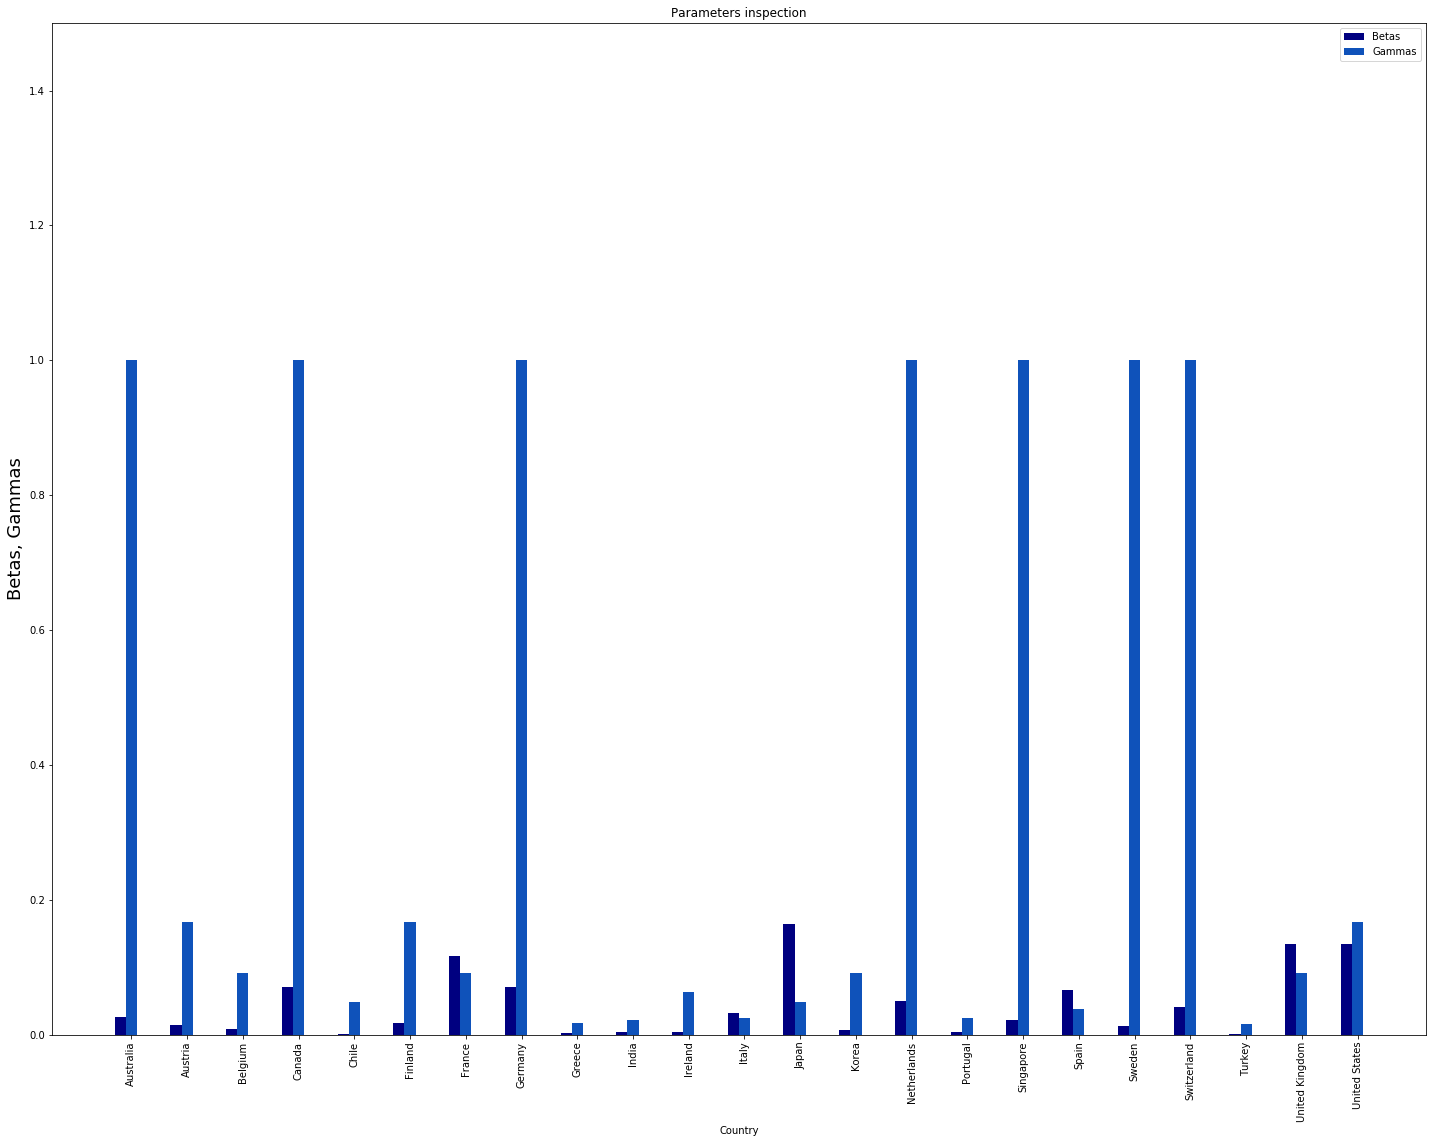

In [10]:
countries = [i for i in data['Country']]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

graph_data = np.zeros(len(countries)*2).reshape(len(countries), 2)
for i in range(len(data)):
    graph_data[i][0] = data['betas'][i]
    graph_data[i][1] = data['gammas'][i]
    



length = len(countries)
x_labels = countries

# Set plot parameters
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(111)
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, graph_data[:,0], width, color='#000080', label='Betas')
ax.bar(x + width, graph_data[:,1], width, color='#0F52BA', label='Gammas')


ax.set_ylabel('Betas, Gammas', fontsize=18)
ax.set_ylim(0,1.5)
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Country')
ax.set_title('Parameters inspection')
ax.legend()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.xticks(rotation='vertical')


In [11]:
fig.tight_layout()
fig.savefig('Betas&Gammas.png')

### Visualize Claims

(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
        11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
        22.2]), <a list of 23 Text xticklabel objects>)

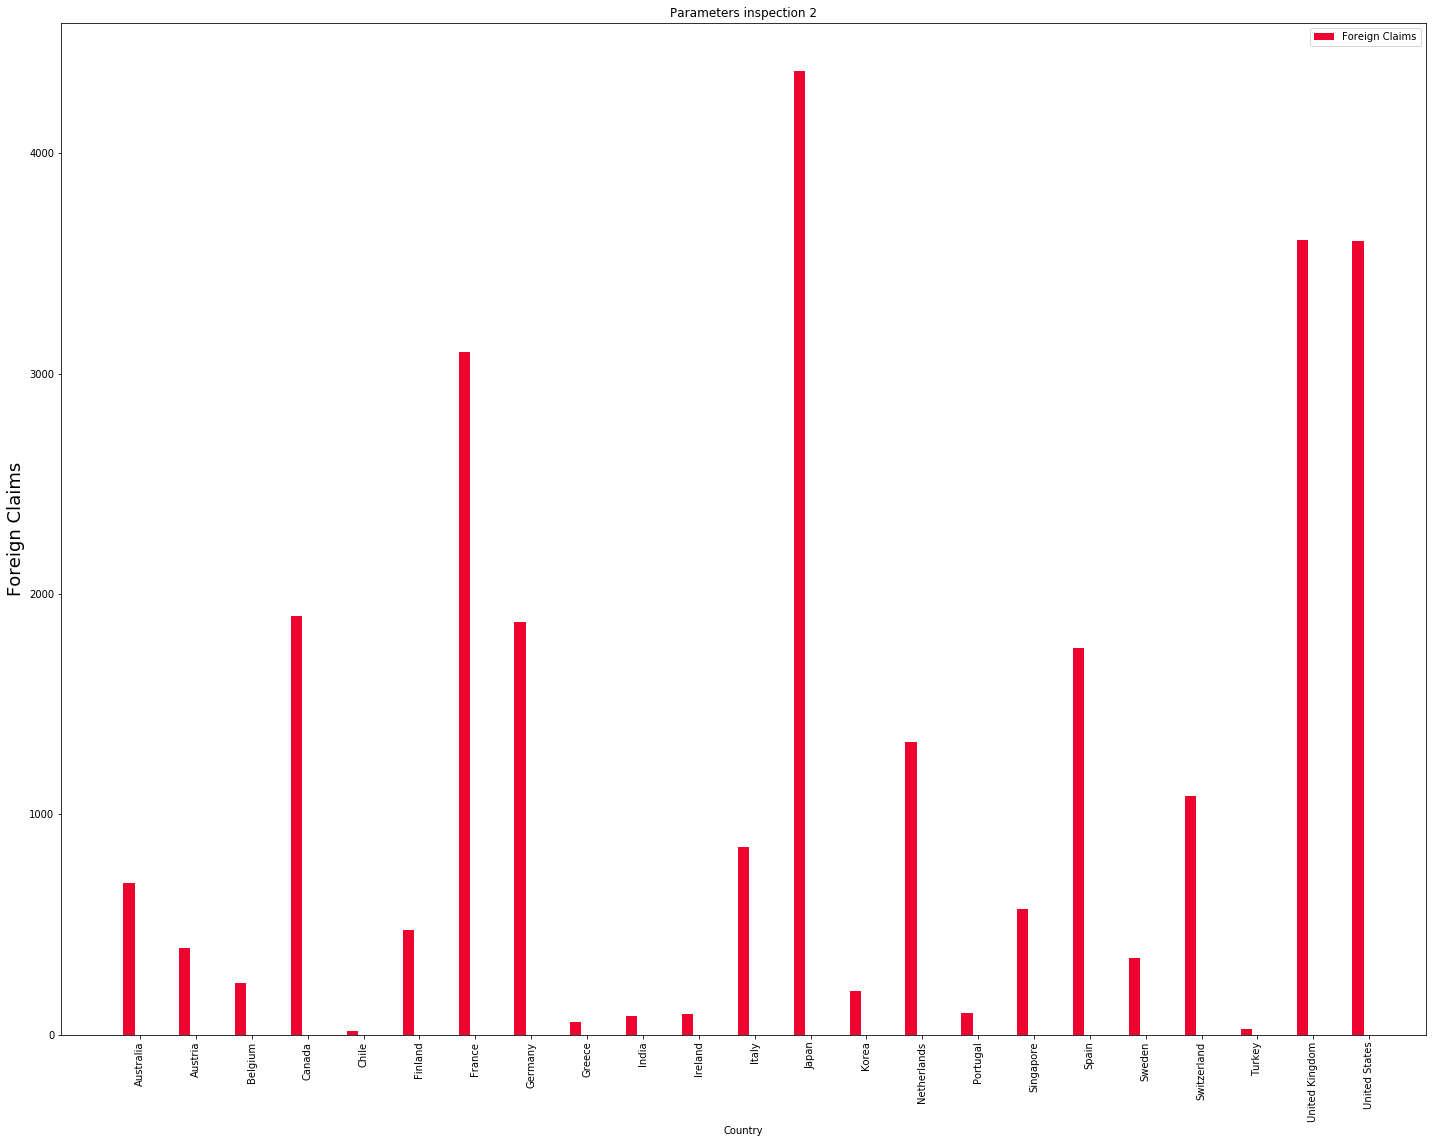

In [12]:

countries = [i for i in data['Country']]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

graph_data = np.zeros(len(countries)*2).reshape(len(countries), 2)
for i in range(len(data)):
    graph_data[i][0] = data['Foreign Claims'][i]
    graph_data[i][1] = data['Derivatives'][i]
    



length = len(countries)
x_labels = countries

# Set plot parameters
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(111)
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, graph_data[:,0], width, color='#ed052f', label='Foreign Claims')
#ax.bar(x + width, graph_data[:,1], width, color='#ed8505', label='Derivatives')


ax.set_ylabel('Foreign Claims', fontsize=18)
#ax.set_ylim(0,1.5)
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Country')
ax.set_title('Parameters inspection 2')
ax.legend()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.xticks(rotation='vertical')


In [13]:
fig.tight_layout()
fig.savefig('ForeignClaims.png')

### Visualize Derivatives

(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
        11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
        22.2]), <a list of 23 Text xticklabel objects>)

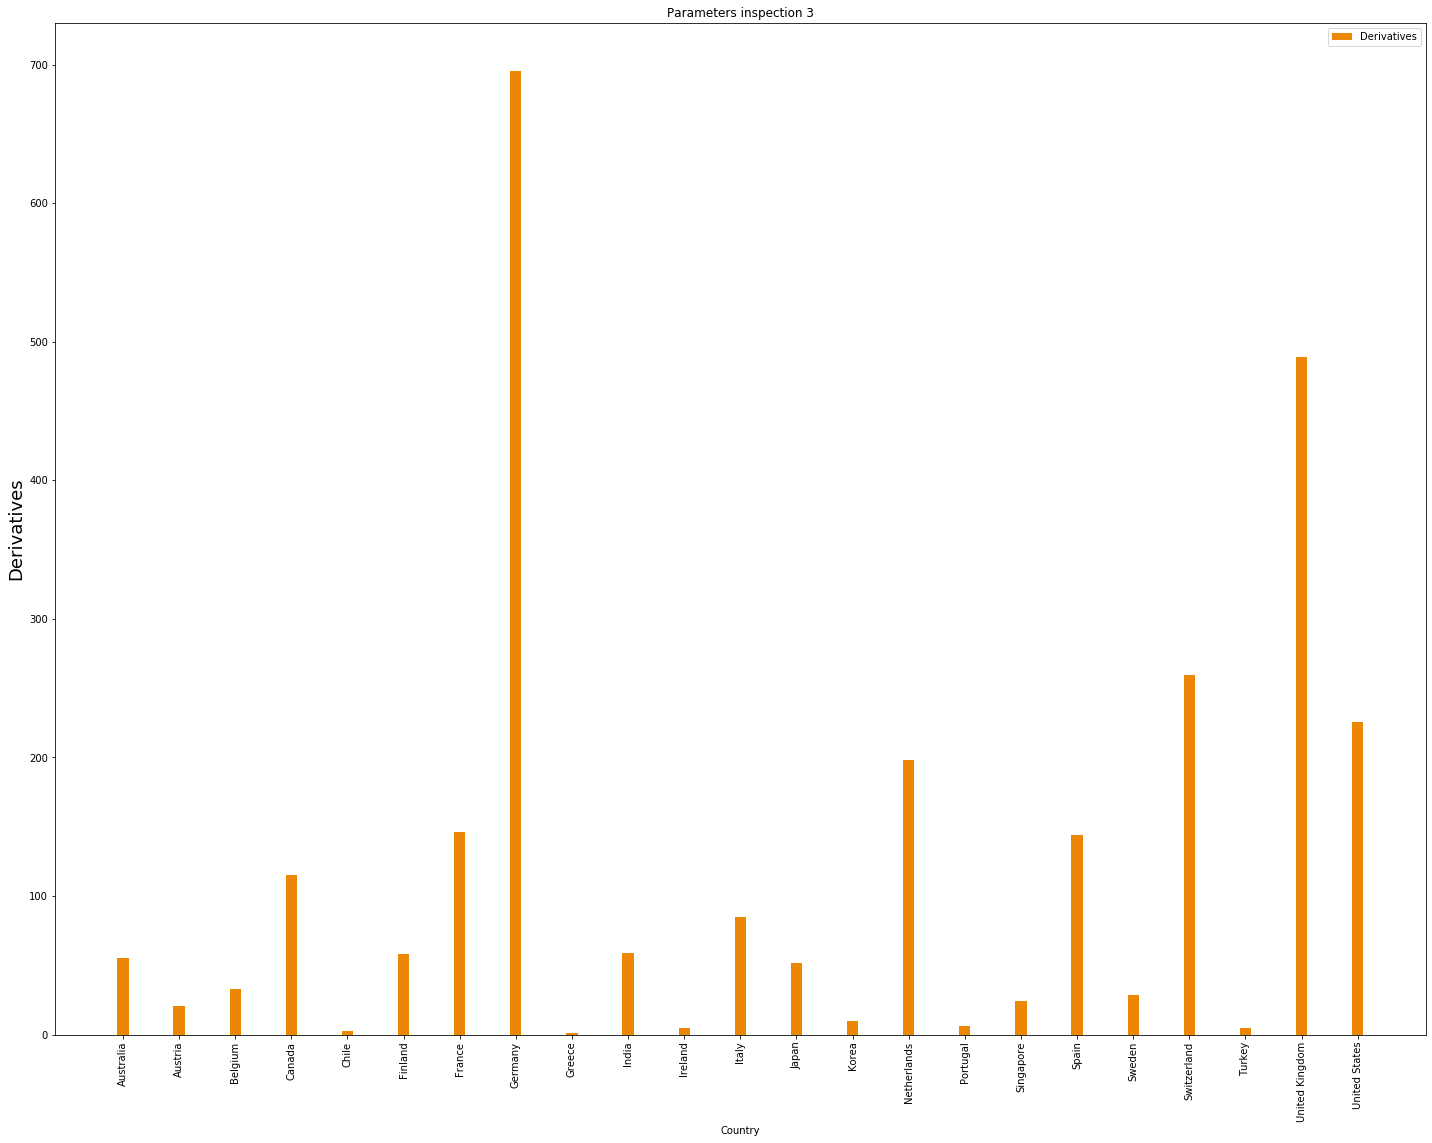

In [14]:
countries = [i for i in data['Country']]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

graph_data = np.zeros(len(countries)*2).reshape(len(countries), 2)
for i in range(len(data)):
    graph_data[i][0] = data['Foreign Claims'][i]
    graph_data[i][1] = data['Derivatives'][i]
    



length = len(countries)
x_labels = countries

# Set plot parameters
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(111)
width = 0.2 # width of bar
x = np.arange(length)

#ax.bar(x, graph_data[:,0], width, color='#ed052f', label='Foreign Claims')
ax.bar(x + width, graph_data[:,1], width, color='#ed8505', label='Derivatives')


ax.set_ylabel('Derivatives', fontsize=18)
#ax.set_ylim(0,1.5)
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Country')
ax.set_title('Parameters inspection 3')
ax.legend()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.xticks(rotation='vertical')

In [15]:
fig.tight_layout()
fig.savefig('Derivatives.png')

### Visualize Credit Score



(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
        11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
        22.2]), <a list of 23 Text xticklabel objects>)

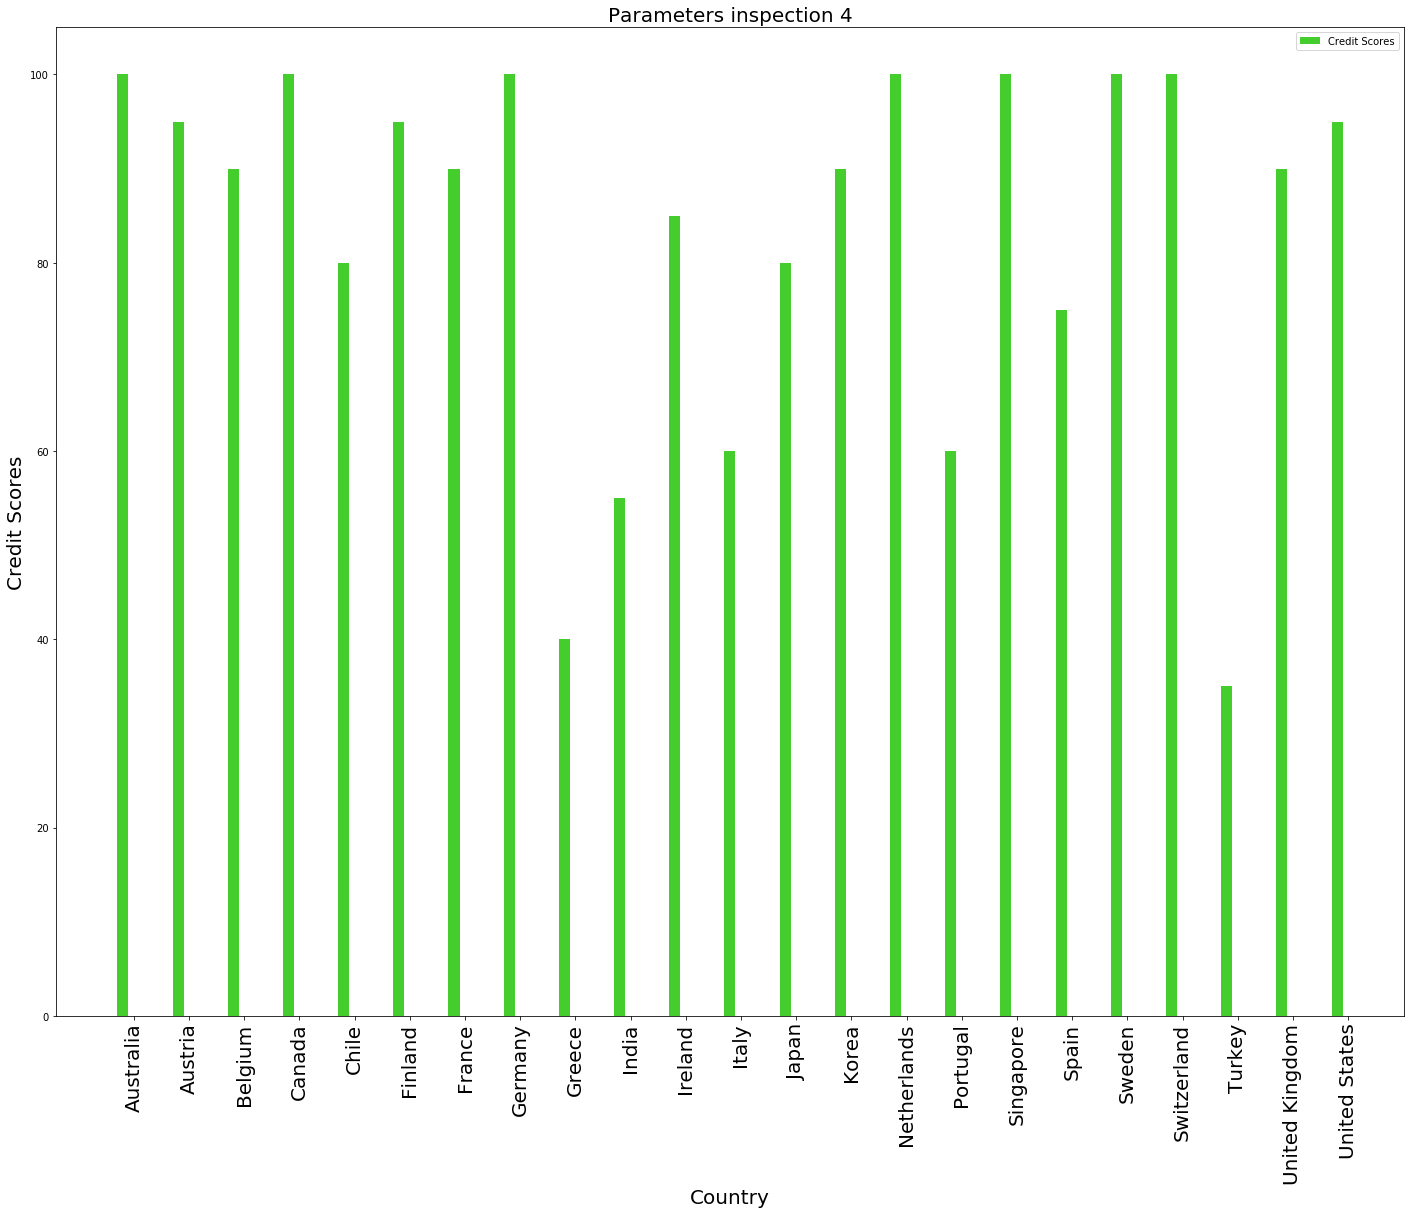

In [16]:
countries = [i for i in data['Country']]

graph_data = np.zeros(len(countries)*2).reshape(len(countries), 2)
for i in range(len(data)):
    graph_data[i][0] = data['Numeric Value'][i]
    

length = len(countries)
x_labels = countries

# Set plot parameters
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(111)
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, graph_data[:,0], width, color='#45cc2d', label='Credit Scores')


ax.set_ylabel('Credit Scores', fontsize=20)
#ax.set_ylim(0,1.5)
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels, fontsize=20)
ax.set_xlabel('Country', fontsize=20)
ax.set_title('Parameters inspection 4', fontsize=20)
ax.legend()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.xticks(rotation='vertical')


In [17]:
fig.tight_layout()
fig.savefig('CreditScores.png')

## Network Graph

/Users/mikkelduif/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


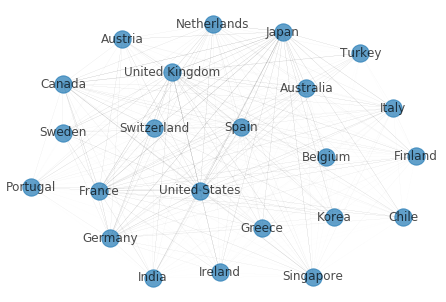

In [18]:
# We initialize the graph with all countries included
countries = [i for i in data['Country']]

G = nx.Graph()
for i in countries:
    G.add_node(i)

# We define the betas as weights, weights are edge attributes, hence we are taking the average between the two nodes 
# beta each edge is connecting

betas_nx=np.zeros(23**2).reshape(23, 23)
for i in range(len(data)):
    for j in range(i+1, len(data)):
        if i!=j:
            betas_nx[i][j]=((data['betas'][i]+data['betas'][j])/2) 
    
# We add the weights/betas as node attributes

for i in range(len(countries)):
    for j in range(i+1, len(countries)):
        G.add_edge(countries[i], countries[j], weights = betas_nx[i][j])

# We define parameters for plotting

edgewidth = [d['weights'] for (u,v,d) in G.edges(data=True)] #for visualization

nx_kwargs = {"with_labels":True, "width": edgewidth, "alpha": 0.7} #optional arguments to be passed for plotting

# We plot the network

fig = nx.draw(G, with_labels = True, alpha = 0.7, width = edgewidth)